<a href="https://colab.research.google.com/github/deborah-jabes/pets_detection/blob/main/ReadingData_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Pets detection**

M.CONREUX - A.GERARD - D.JABES

IR4 - Promotion 2022

Python - April 2021

---



**CONTEXT**

Today, many people have cameras with motion sensors in their home. However, if they have pets, that could cause a problem and the question is:

**How the video surveillance can recognize the different pets on an image?**

Don’t worry, today, we have the solution for you: in this program, we developed a prototype which can recognize pets. Indeed, it allows one to upload pictures of their pets, so that the motion sensor would not trigger the alarm when there is only a pet on the image captured by the system. For that, we used classification, a very common method  in Machine Learning to recognize and classify object with labels.



---





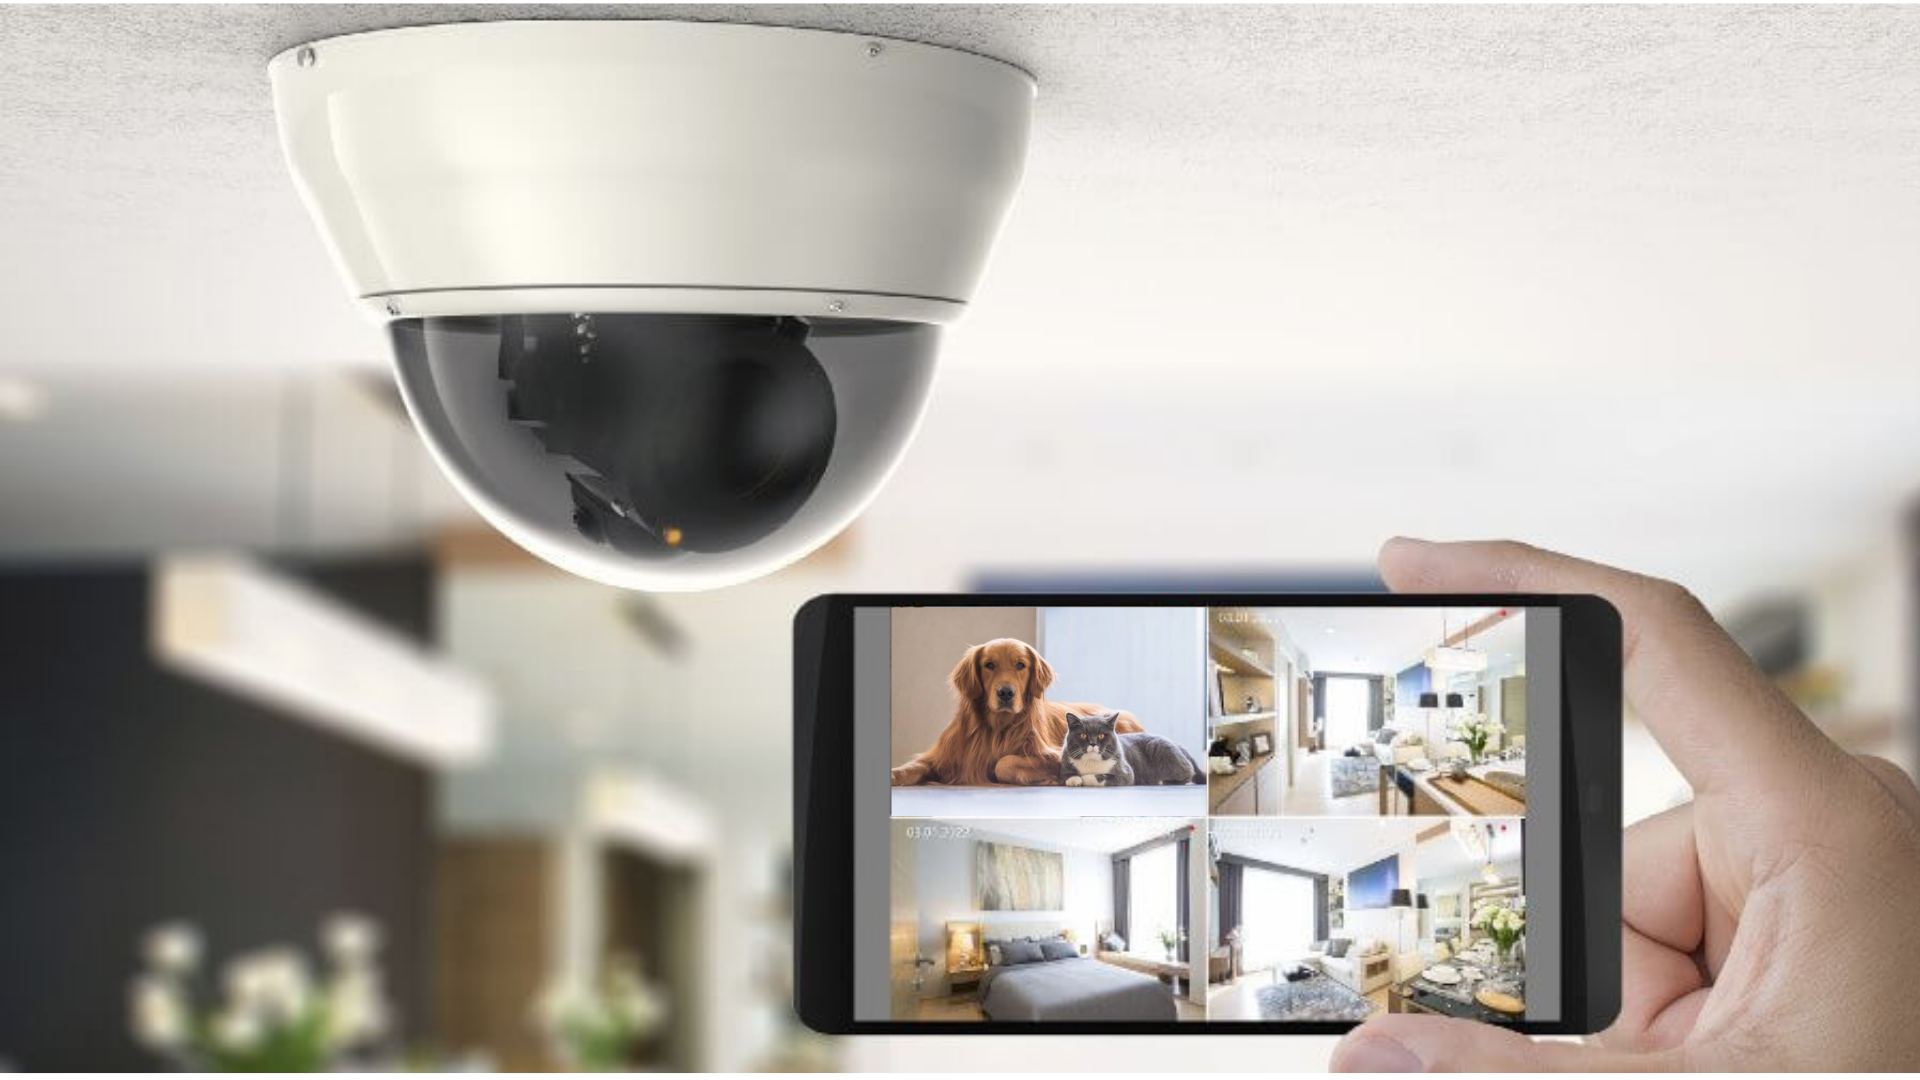

#**Step 1 : Connect to our google drive and import necessary libraries**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import numpy as np   # Package for scientific computing
import matplotlib.pyplot as plt # 2D plotting library
import os     # Using operating system

import cv2    # Computer vision and machine learning software library
from tqdm import tqdm   # Progress bar library
import random  # Generating Random Numbers
from sklearn.model_selection import train_test_split # Split data into train and test library

from skimage.color import rgb2gray # Change rgb images to grayscale images

# **Step 2 : Reading and saving data** 



In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
#Move it to the right folder 
!mkdir .kaggle
!mv .kaggle /root
!mv kaggle.json /root/.kaggle

In [6]:
#Downloading the dataset from kaggle using the API
!kaggle datasets download -d tongpython/cat-and-dog

 97% 211M/218M [00:02<00:00, 86.0MB/s]
100% 218M/218M [00:02<00:00, 87.2MB/s]


In [7]:
# Extract folders with training and test sets from the zip file
import zipfile

with zipfile.ZipFile('cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

#**Step 3 : Creating the categories and load images and labels**

In [8]:
DATADIR ="training_set/training_set"  # Setting the directory where we would find our images next

CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['cats', 'dogs']


In [9]:
training_data = []
IMG_SIZE_H=80 # in a case of resize to normalize data size
IMG_SIZE_W=80 # in a case of resize to normalize data size
def create_training_data():
    for category in CATEGORIES:  # do cats and dogs

        path = os.path.join(DATADIR,category)  # create path to cats and dogs
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=cats 1=dogs

        for img in tqdm(os.listdir(path)):  # iterate over each image per cats and dogs
        
            img_array = cv2.imread(os.path.join(path,img))  # convert to array 
            try:
              new_array = cv2.resize(img_array, (IMG_SIZE_H, IMG_SIZE_W))  # resize to normalize data size
              gray_array = rgb2gray(new_array) # images to gray scale
            except:
              break
            training_data.append([gray_array, class_num])  # add this to our training_data

In [10]:
create_training_data()  # Calling the function for reading images and labels
print(len(training_data)) # Printing the size of the database

 45%|████▌     | 1814/4006 [00:04<00:04, 442.32it/s]

3729


# **Step 4 : Preparation of data**

In [11]:
random.shuffle(training_data)   # Shuffling data
X = []  # An Array for images
y = []  # An Array for labels

for image,label in training_data:   # Separation of images and labels
    X.append(image)
    y.append(label)

# **Step 5 : Visualisation of the data**

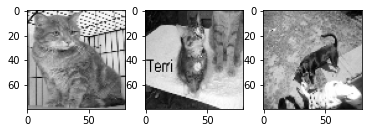

0 0 1


In [12]:
# plot 3 images as gray scale
plt.subplot(131)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X[1], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
print(y[0], y[1], y[3])

In [13]:
X = np.array(X).reshape(len(X), -1)  # Reshape data in a form that is suitable for keras

print(X.shape) # Print the size of the database

(3729, 6400)


#**Step 6 : Classification**

In [14]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [15]:
#Import svm model
from sklearn import svm

# Create a classifier: a support vector classifier
clf = svm.SVC()

# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# Predict the value of the digit on the test subset
y_pred = clf.predict(X_test)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6032171581769437


In [18]:
print("Precision Score : ",metrics.precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,
                                           average='micro'))

Precision Score :  0.6032171581769437
Recall Score :  0.6032171581769437


(1865, 6400)


TypeError: ignored

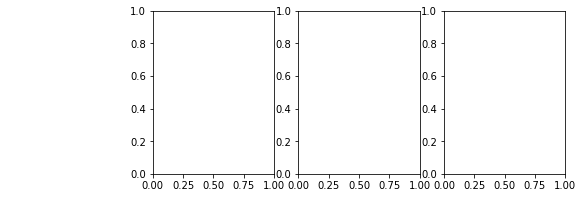

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
print(X_test.shape)
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    #image = image.reshape(6400)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

print(image.shape)

In [ ]:
# Classification report

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

In [ ]:
#  Confusion matrix 

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()